# Impot dependencies

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
#loading the data
data=pd.read_csv('happiness_score_dataset.csv')

In [3]:
# Top 5 rows
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data.shape

(158, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Correlation with target columns

In [6]:
data.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<AxesSubplot:>

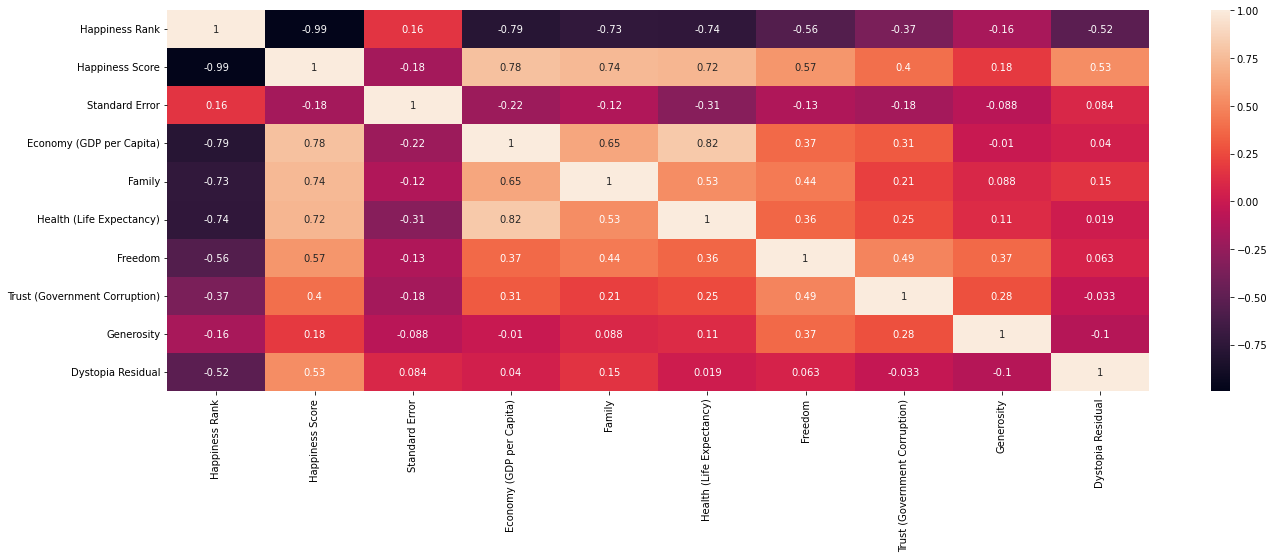

In [7]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True)

# Checking the columns which are positivaly and negatively correlated with target column

Text(0.5, 1.0, 'correlation')

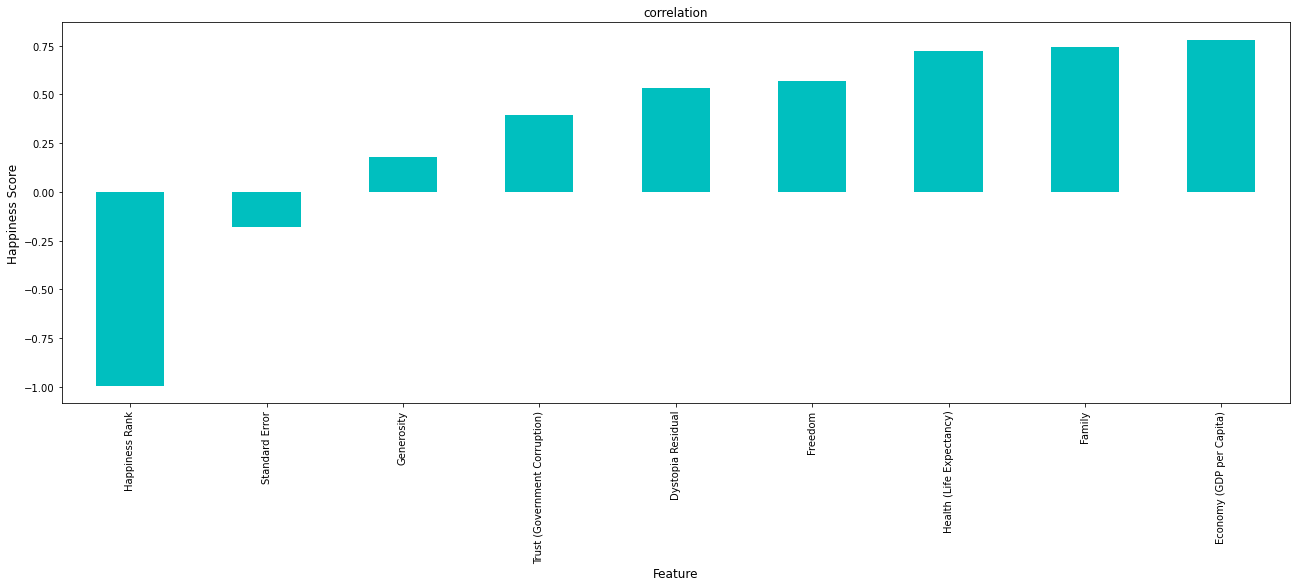

In [8]:
plt.figure(figsize=(22,7))
data.corr()['Happiness Score'].sort_values().drop(['Happiness Score']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('correlation', fontsize=12)

# Split into Train and Test (Validation) sets and Model training

In [9]:
# droping the column which do not help in predicting the happiness score from feature set(x)
x=data.drop(columns=['Country','Happiness Rank','Standard Error','Happiness Score','Region'])
y=data['Happiness Score']

In [10]:
print('X is',x)
print('Y is \n',y)

X is      Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
155                   0.66320  0.47489                   0.72193  0.15684   
156                   0.01530  0.41587                   0.22396  0.11850   
157                   0.20868  0.13995                   0.28443  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0 

In [12]:
lr_model=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=i)
    lr_model.fit(x_train,y_train)
    pred_train=lr_model.predict(x_train)
    pred_test=lr_model.predict(x_test)
    print("At random state", i ,"the training accuracy is", r2_score(y_train,pred_train))
    print("At random state", i ,"the testing accuracy is", r2_score(y_test,pred_test))
    print("\n")

At random state 0 the training accuracy is 0.9999999489680212
At random state 0 the testing accuracy is 0.9999999035357195


At random state 1 the training accuracy is 0.9999999426736762
At random state 1 the testing accuracy is 0.9999999355921718


At random state 2 the training accuracy is 0.999999937229435
At random state 2 the testing accuracy is 0.9999999535717998


At random state 3 the training accuracy is 0.9999999412242133
At random state 3 the testing accuracy is 0.9999999430412011


At random state 4 the training accuracy is 0.9999999343187498
At random state 4 the testing accuracy is 0.9999999537558913


At random state 5 the training accuracy is 0.9999999462861999
At random state 5 the testing accuracy is 0.9999999028525701


At random state 6 the training accuracy is 0.9999999438395032
At random state 6 the testing accuracy is 0.9999999311762418


At random state 7 the training accuracy is 0.9999999415268171
At random state 7 the testing accuracy is 0.9999999381573352


A

Since accuracy at all random state is 99.99 percent we can use any of the random state

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=2)

In [14]:
print(x.shape,x_train.shape,x_test.shape)

(158, 7) (126, 7) (32, 7)


In [15]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [16]:
pred_train=lr_model.predict(x_train)

In [17]:
print(r2_score(y_train,pred_train))

0.999999937229435


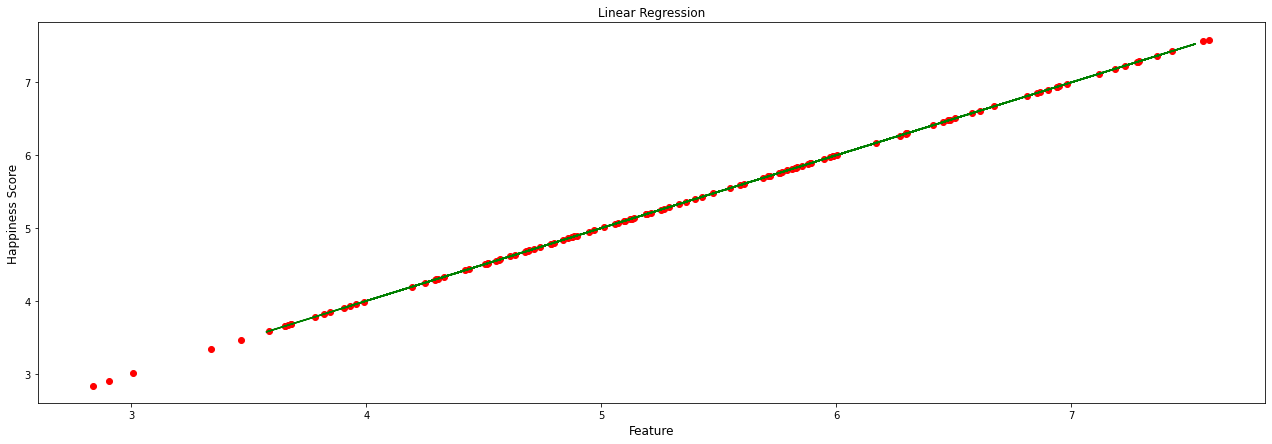

In [23]:
#Scatter plot for train set
plt.figure(figsize=(22,7))
plt.scatter(x=y_train,y=pred_train, color='r')
plt.plot(y_test,y_test, color='g')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Linear Regression', fontsize=12)
plt.show()

In [18]:
pred_test=lr_model.predict(x_test)

In [19]:
print(r2_score(y_test,pred_test))

0.9999999535717998


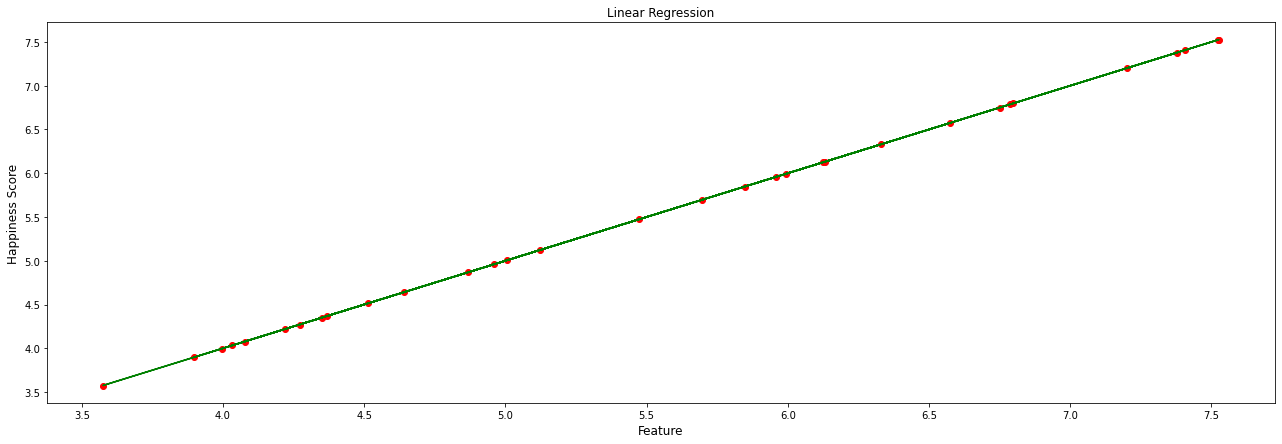

In [24]:
#Regression plot for test set
plt.figure(figsize=(22,7))
plt.scatter(x=y_test,y=pred_test, color='r')
plt.plot(y_test,y_test, color='g')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Linear Regression', fontsize=12)
plt.show()

# Cross validation of the model

In [20]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr_model,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"AT cross fold {j} the cv score is {cv_mean}")
    print('\n')


AT cross fold 2 the cv score is 0.9999997647043926


AT cross fold 3 the cv score is 0.9999995016578286


AT cross fold 4 the cv score is 0.9999987967817485


AT cross fold 5 the cv score is 0.9999981947416543


AT cross fold 6 the cv score is 0.9999972688320694


AT cross fold 7 the cv score is 0.9999957517670529


AT cross fold 8 the cv score is 0.9999956559939313


AT cross fold 9 the cv score is 0.9999935038005747




Our model is 99.99% accurate

# Model Saving

In [25]:
import pickle
filename='Happiness_score.pkl'
pickle.dump(lr_model, open(filename,'wb'))

# Conclusion

In [26]:
a=np.array(y_test)
predicted=np.array(pred_test)
df=pd.DataFrame({'Original':a,'Predicted':predicted})

In [27]:
df

,Original,Predicted
0,7.200,7.199800
1,7.522,7.522122
2,3.575,3.574589
3,7.378,7.378057
4,4.514,4.514384
5,4.218,4.218538
6,5.474,5.473739
7,3.896,3.896537
8,6.574,6.574081
9,4.033,4.033087
